In [7]:
#Use huggingface transformers library for ESM model
import os
os.chdir('/home/azamh/bioinf')
import sys
from transformers import EsmTokenizer, EsmModel, EsmForSequenceClassification
from transformers import TrainingArguments, Trainer
import numpy as np
from utils.parse_data import *
from utils.rep3d import *
from utils.visuallize import *
from script.models import *
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
torch.backends.cudnn.benchmark = True
from sklearn.metrics import accuracy_score, matthews_corrcoef, classification_report, f1_score


%load_ext autoreload
%autoreload 2

In [8]:
repo = 'facebook/esm2_t30_150M_UR50D'

In [9]:
#Evaluate performance
trained_epochs = 4

#Create dataframe
for epoch in range(trained_epochs):
    epoch_results_path  = os.path.join(os.path.join('models', repo), f'{epoch}_results.pt')
    epoch_results_dict = torch.load(epoch_results_path)
    
    #Get mean loss
    mean_train_loss = np.mean(epoch_results_dict['training_losses'])
    mean_test_loss = np.mean(epoch_results_dict['test_losses'])
    train_accuracy = accuracy_score(epoch_results_dict['training_labels'], epoch_results_dict['training_predictions'])
    test_accuracy = accuracy_score(epoch_results_dict['test_labels'], epoch_results_dict['test_predictions'])
    train_f1 = f1_score(epoch_results_dict['training_labels'], epoch_results_dict['training_predictions'], average = 'macro')
    test_f1 = f1_score(epoch_results_dict['test_labels'], epoch_results_dict['test_predictions'], average = 'macro')
    print(f'Epoch: {epoch}')
    print(f'\tMean Train Loss: {mean_train_loss}')
    print(f'\tMean Test Loss: {mean_test_loss}')
    print(f'\tTrain Accuracy: {train_accuracy}')
    print(f'\tTest Accuracy: {test_accuracy}')
    print(f'\tTrain F1: {train_f1}')
    print(f'\tTest F1: {test_f1}')
    


Epoch: 0
	Mean Train Loss: 1.1990531904517818
	Mean Test Loss: 0.802336326923715
	Train Accuracy: 0.6674669867947179
	Test Accuracy: 0.7646348823174411
	Train F1: 0.4512442141462941
	Test F1: 0.5309422098606118
Epoch: 1
	Mean Train Loss: 0.6255601739437103
	Mean Test Loss: 0.6699126235781664
	Train Accuracy: 0.8286314525810324
	Test Accuracy: 0.791792395896198
	Train F1: 0.6163677391360866
	Test F1: 0.588747286365243
Epoch: 2
	Mean Train Loss: 0.4177551247595417
	Mean Test Loss: 0.6507728146950165
	Train Accuracy: 0.8867046818727491
	Test Accuracy: 0.8032589016294508
	Train F1: 0.7014558470588119
	Test F1: 0.6158978910460566
Epoch: 3
	Mean Train Loss: 0.27534804769790544
	Mean Test Loss: 0.7368979784244873
	Train Accuracy: 0.930672268907563
	Test Accuracy: 0.7972238986119493
	Train F1: 0.8112940946333957
	Test F1: 0.6310481541476418


In [10]:
#Evaluate performance
trained_epochs = 12
fusion_dict = dict()

#Create dataframe
for epoch in range(trained_epochs):
    epoch_results_path  = os.path.join('models/fusion', f'{epoch}_results.pt')
    epoch_results_dict = torch.load(epoch_results_path)
    
    #Get mean loss
    mean_train_loss = np.mean(epoch_results_dict['training_losses'])
    mean_test_loss = np.mean(epoch_results_dict['test_losses'])
    train_accuracy = accuracy_score(epoch_results_dict['training_labels'], epoch_results_dict['training_predictions'])
    test_accuracy = accuracy_score(epoch_results_dict['test_labels'], epoch_results_dict['test_predictions'])
    train_f1 = f1_score(epoch_results_dict['training_labels'], epoch_results_dict['training_predictions'], average = 'macro')
    test_f1 = f1_score(epoch_results_dict['test_labels'], epoch_results_dict['test_predictions'], average = 'macro')
    print(f'Epoch: {epoch}')
    print(f'\tMean Train Loss: {mean_train_loss}')
    print(f'\tMean Test Loss: {mean_test_loss}')
    print(f'\tTrain Accuracy: {train_accuracy}')
    print(f'\tTest Accuracy: {test_accuracy}')
    print(f'\tTrain F1: {train_f1}')
    print(f'\tTest F1: {test_f1}')
    fusion_dict[epoch] = {
        'mean_train_loss':mean_train_loss,
        'mean_test_loss':mean_test_loss,
        'train_accuracy':train_accuracy,
        'test_accuracy':test_accuracy,
        'train_f1':train_f1,
        'test_f1':test_f1,
    }

fusion_df = pd.DataFrame(fusion_dict).transpose()
    


Epoch: 0
	Mean Train Loss: 0.3841411991904904
	Mean Test Loss: 1.245681384148506
	Train Accuracy: 0.9134153661464586
	Test Accuracy: 0.791792395896198
	Train F1: 0.8072309223826085
	Test F1: 0.6481854297145022
Epoch: 1
	Mean Train Loss: 0.2802153934577578
	Mean Test Loss: 1.0828705965899503
	Train Accuracy: 0.9389255702280912
	Test Accuracy: 0.7779118889559444
	Train F1: 0.8609806928956815
	Test F1: 0.6598515640788826
Epoch: 2
	Mean Train Loss: 0.2611057353005455
	Mean Test Loss: 0.967700242709655
	Train Accuracy: 0.9410264105642256
	Test Accuracy: 0.7990343995171998
	Train F1: 0.8760718758911473
	Test F1: 0.6502612332032033
Epoch: 3
	Mean Train Loss: 0.257892661382618
	Mean Test Loss: 1.2383790964690538
	Train Accuracy: 0.9455282112845138
	Test Accuracy: 0.8056729028364514
	Train F1: 0.8866640438044868
	Test F1: 0.6660694639568242
Epoch: 4
	Mean Train Loss: 0.25834431890932996
	Mean Test Loss: 1.0589142880187585
	Train Accuracy: 0.945828331332533
	Test Accuracy: 0.7966203983101992
	Tr

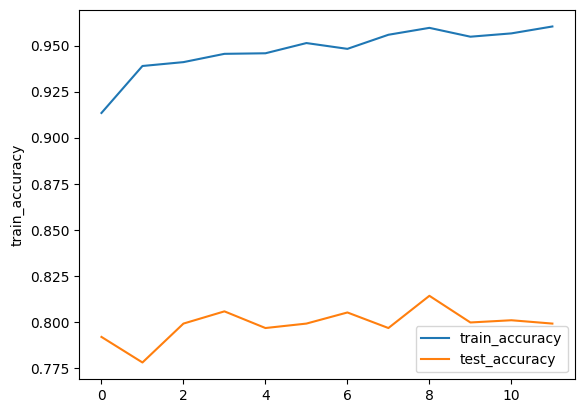

In [11]:
sns.lineplot(fusion_df, x = fusion_df.index, y = 'train_accuracy', label = 'train_accuracy')
sns.lineplot(fusion_df, x = fusion_df.index, y = 'test_accuracy', label = 'test_accuracy')
plt.legend()

In [12]:
#Evaluate performance
trained_epochs = 100
vgg_dict = dict()

#Create dataframe
for epoch in range(trained_epochs):
    epoch_results_path  = os.path.join('models/vgg16_3d', f'{epoch}_results.pt')
    epoch_results_dict = torch.load(epoch_results_path)
    
    #Get mean loss
    mean_train_loss = np.mean(epoch_results_dict['training_losses'])
    mean_test_loss = np.mean(epoch_results_dict['test_losses'])
    train_accuracy = accuracy_score(epoch_results_dict['training_labels'], epoch_results_dict['training_predictions'])
    test_accuracy = accuracy_score(epoch_results_dict['test_labels'], epoch_results_dict['test_predictions'])
    train_f1 = f1_score(epoch_results_dict['training_labels'], epoch_results_dict['training_predictions'], average = 'macro')
    test_f1 = f1_score(epoch_results_dict['test_labels'], epoch_results_dict['test_predictions'], average = 'macro')
    print(f'Epoch: {epoch}')
    print(f'\tMean Train Loss: {mean_train_loss}')
    print(f'\tMean Test Loss: {mean_test_loss}')
    print(f'\tTrain Accuracy: {train_accuracy}')
    print(f'\tTest Accuracy: {test_accuracy}')
    print(f'\tTrain F1: {train_f1}')
    print(f'\tTest F1: {test_f1}')
    vgg_dict[epoch] = {
        'mean_train_loss':mean_train_loss,
        'mean_test_loss':mean_test_loss,
        'train_accuracy':train_accuracy,
        'test_accuracy':test_accuracy,
        'train_f1':train_f1,
        'test_f1':test_f1,
    }

vgg_df = pd.DataFrame(vgg_dict)
    


Epoch: 0
	Mean Train Loss: 28258616.72841692
	Mean Test Loss: 1.9820001832274503
	Train Accuracy: 0.27039605767475816
	Test Accuracy: 0.2906511458712259
	Train F1: 0.06395237927983154
	Test F1: 0.04503945885005637
Epoch: 1
	Mean Train Loss: 1.987628281985358
	Mean Test Loss: 1.9794626610223638
	Train Accuracy: 0.29248037963131956
	Test Accuracy: 0.2906511458712259
	Train F1: 0.04585856266455904
	Test F1: 0.04503945885005637
Epoch: 2
	Mean Train Loss: 2.0084441959336616
	Mean Test Loss: 1.9791009453840034
	Train Accuracy: 0.2919328344588428
	Test Accuracy: 0.2906511458712259
	Train F1: 0.04595776650843631
	Test F1: 0.04503945885005637
Epoch: 3
	Mean Train Loss: 1.9878603018407572
	Mean Test Loss: 1.9788748289263525
	Train Accuracy: 0.2916590618726045
	Test Accuracy: 0.2906511458712259
	Train F1: 0.04560963575453536
	Test F1: 0.04503945885005637
Epoch: 4
	Mean Train Loss: 1.9903683992586052
	Mean Test Loss: 1.9790317000344742
	Train Accuracy: 0.2925716371600657
	Test Accuracy: 0.29065114

In [13]:
vgg_df = vgg_df.transpose()

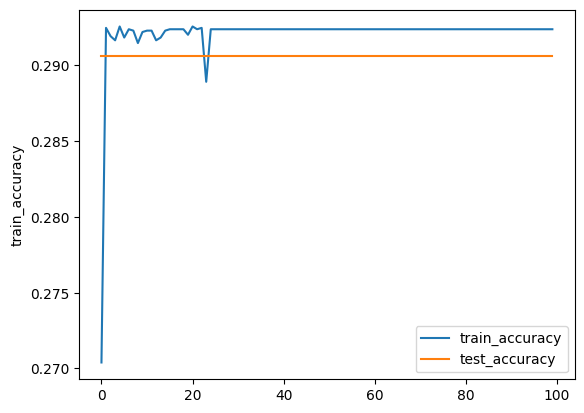

In [14]:
sns.lineplot(vgg_df, x = vgg_df.index, y = 'train_accuracy' , label = 'train_accuracy')
sns.lineplot(vgg_df, x = vgg_df.index, y = 'test_accuracy', label = 'test_accuracy')
plt.legend()


In [15]:
#Evaluate performance
trained_epochs = 31
alex_dict = dict()

#Create dataframe
for epoch in range(trained_epochs):
    epoch_results_path  = os.path.join('models/alex_3d', f'{epoch}_results.pt')
    epoch_results_dict = torch.load(epoch_results_path)
    
    #Get mean loss
    mean_train_loss = np.mean(epoch_results_dict['training_losses'])
    mean_test_loss = np.mean(epoch_results_dict['test_losses'])
    train_accuracy = accuracy_score(epoch_results_dict['training_labels'], epoch_results_dict['training_predictions'])
    test_accuracy = accuracy_score(epoch_results_dict['test_labels'], epoch_results_dict['test_predictions'])
    train_f1 = f1_score(epoch_results_dict['training_labels'], epoch_results_dict['training_predictions'], average = 'macro')
    test_f1 = f1_score(epoch_results_dict['test_labels'], epoch_results_dict['test_predictions'], average = 'macro')
    print(f'Epoch: {epoch}')
    print(f'\tMean Train Loss: {mean_train_loss}')
    print(f'\tMean Test Loss: {mean_test_loss}')
    print(f'\tTrain Accuracy: {train_accuracy}')
    print(f'\tTest Accuracy: {test_accuracy}')
    print(f'\tTrain F1: {train_f1}')
    print(f'\tTest F1: {test_f1}')
    alex_dict[epoch] = {
        'mean_train_loss':mean_train_loss,
        'mean_test_loss':mean_test_loss,
        'train_accuracy':train_accuracy,
        'test_accuracy':test_accuracy,
        'train_f1':train_f1,
        'test_f1':test_f1,
    }

alex_df = pd.DataFrame(alex_dict).transpose()
    


Epoch: 0
	Mean Train Loss: 2.1802498414982163
	Mean Test Loss: 1.9861104308172715
	Train Accuracy: 0.2879175031940135
	Test Accuracy: 0.2906511458712259
	Train F1: 0.05280253858837016
	Test F1: 0.04503945885005637
Epoch: 1
	Mean Train Loss: 1.9859557120515028
	Mean Test Loss: 1.9853967026222583
	Train Accuracy: 0.29238912210257345
	Test Accuracy: 0.2906511458712259
	Train F1: 0.04524784634938568
	Test F1: 0.04503945885005637
Epoch: 2
	Mean Train Loss: 1.9848016990517041
	Mean Test Loss: 1.985365257706753
	Train Accuracy: 0.29238912210257345
	Test Accuracy: 0.2906511458712259
	Train F1: 0.04524784634938568
	Test F1: 0.04503945885005637
Epoch: 3
	Mean Train Loss: 1.9844335262003863
	Mean Test Loss: 1.980125370413758
	Train Accuracy: 0.29238912210257345
	Test Accuracy: 0.2906511458712259
	Train F1: 0.04524784634938568
	Test F1: 0.04503945885005637
Epoch: 4
	Mean Train Loss: 1.9848671988217546
	Mean Test Loss: 1.9852607471998347
	Train Accuracy: 0.29238912210257345
	Test Accuracy: 0.290651